# Lab 7 - Eigenproblems

In this set of lab activities, we will explore eigenvlaues, eigenvectors, and related methods. Remember from class that we have the relationship:

$$
\mathsf{A} \vec{v}_i = \lambda_i \vec{v}_i
$$

where $\vec{v}_i$ is the eigenvector of the matrix $\mathsf{A}$ corresponding to the eigenvalue $\lambda_i$. 

### Activity 1: Eigenvalues and Eigenvectors

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

Let's start with a simple example of a 2x2 matrix. Use `np.linalg.eig()' to find eigenvalues and eigenvectors. 

In [2]:
# Simple 2x2 matrix example
A_2x2 = np.array([[1, 2],
                  [4, 3]])

In [3]:
eigenvals, eigenvecs = np.linalg.eig(A_2x2)

print("Matrix A:")
print(A_2x2)
print(f"\nEigenvalues: {eigenvals}")
print(f"Eigenvectors:\n{eigenvecs}")

Matrix A:
[[1 2]
 [4 3]]

Eigenvalues: [-1.  5.]
Eigenvectors:
[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


Note this 2x2 matrix example is simple enough that you can easily find the eigenvalues yourself by finding roots of the characteristic equation:

$$
\det (A - \lambda I) = 0
$$

In class we showed that this is equivalent to:

$$
\lambda_i = \frac{\text{trace}(\mathsf{A}) \pm \sqrt{(\text{trace}(\mathsf{A}))^2 - 4 \det(\mathsf{A})}}{2}
$$

for a 2x2 matrix. Try implementing this in the cell below and use it to confirm the earlier results of `np.linalg.eig`. Some code is already provided for you to help. 

In [4]:
#compute trace and det of A_2x2
trace_A=np.trace(A_2x2)
det_A=np.linalg.det(A_2x2)

### ADD CODE BELOW TO COMPLETE THE FORMULAS
lambda_1 = (trace_A + np.sqrt(trace_A**2 - 4*det_A))/2

lambda_2 = (trace_A - np.sqrt(trace_A**2 - 4*det_A))/2



eigenvals = np.array([lambda_1, lambda_2])

print(f"\nEigenvalues: {eigenvals}")


Eigenvalues: [ 5. -1.]


Now lets look at a more complex example using a 3x3 matrix. Consider the matrix $\mathsf{A}$ below

In [5]:
A_3x3=np.array([[-18.,  -8., -22.],
               [  2.,  -1.,   2.],
               [ 14.,   7.,  18.]])

Recall that the characteristic equation of a 3x3 matrix is a cubic polynomial. We can write this result in a more compact form using the following notation:

$$
-\lambda^3 + \text{Trace}(\mathsf{A}) \lambda^2 - \text{Minor\_Sum}(\mathsf{A}) \lambda^2 + \det(A) = 0
$$

Below we have implemented this as a function, which constructs the equation given a 3x3 matrix and finds roots to reveal the eigenvalues

In [6]:
def solve_characteristic_3x3(A):
    """
    Computes the characteristic polynomial for a 3x3 matrix, demonstrating how det(A - λI) becomes a cubic polynomial
    returns real eigenvalues of characteristic eqn. 
    """
    if A.shape[0] != 3:
        print("This function only works for 3x3 matrices")
        return None
    
    # The determinant of (A-lambda I) produces a cubic polynomial: -λ³ + c₂λ² + c₁λ + c₀
    # We will solve for the coefficients using the lines below

    # coefficient of the square term
    trace = np.trace(A)  # Sum of diagonal elements
    
    # coefficient of the linear term - Sum of 2x2 principal minors
    minor_sum = ( A[0, 0]* A[1, 1] -  A[0, 1]* A[1, 0]) + ( A[0, 0]* A[2, 2] -  A[0, 2]* A[2, 0]) + ( A[1, 1]* A[2, 2] -  A[1, 2]* A[2, 1])

    # coefficient of the constant term
    det_A=np.round(np.linalg.det(A),7) #introduce rounding on det to improve against numeric instabilitiy

    # print characteristic polynomail
    print(f"\nCharacteristic polynomial: -λ³ + {trace}λ² - {minor_sum}λ + {det_A} = 0")
    
    # Convert to standard form and find roots
    coefficients = [-1, trace, -minor_sum, det_A]  # Coefficients for -λ³ + trace*λ² - minor_sum*λ + det_A
    eigenvalues = np.roots(coefficients)
    
    return eigenvalues

Review the code above to ensure that it makes sense with the given formula in the prior cell. Then let's use it to evaluate and find th eigenvalues of $\mathsf{A}$

In [7]:
#get eigenvalues using our function
eigenvals=solve_characteristic_3x3(A_3x3)

print(f"\nEigenvalues: {eigenvals}")


Characteristic polynomial: -λ³ + -1.0λ² - -14.0λ + 24.0 = 0

Eigenvalues: [ 4. -3. -2.]


Confirm the results of our formula using `np.linalg.eig`

In [9]:
### ADD YOUR CODE BELOW TO COMPLETE THE EXPRESSION
eigenvals, _ = np.linalg.eig(A_3x3)

print(f"\nEigenvalues: {eigenvals}")


Eigenvalues: [ 4. -3. -2.]


### Activity 2: QR Decomposition

In class we discussed the QR decompositon, which takes a matrix $\mathsf{A}$ and expresses it as a product $\mathsf{Q R}$, where $\mathsf{Q}$ is orthogonal and $\mathsf{R}$ is upper triangular. Numpy.linag has a built in function for QR decomposition. Let's try using it on our matrix A_3x3 from the previous activity. 

In [10]:
Q, R = np.linalg.qr(A_3x3)

print("Matrix Q:")
print(Q)

print("\nMatrix R:")
print(R)

Matrix Q:
[[-0.78633365  0.12098839  0.60583925]
 [ 0.08737041 -0.94900269  0.30291963]
 [ 0.61159284  0.29112832  0.73566195]]

Matrix R:
[[22.89104628 10.48444868 28.48275225]
 [ 0.          2.01899378  0.6805597 ]
 [ 0.          0.          0.51929079]]


By printing the matricies, we can easily confirm that the matrix $\mathsf{R}$ is upper triangular. How do we know $\mathsf{Q}$ is orthognal? Check the relation $\mathsf{Q^T Q = I}$. 

In [11]:
#perform matrix multiplication. Note the use of the '@' sign which is generally prefered for multiplication in higher order matricies
QTQ = Q.T @ Q

print("\nMatrix Q^T Q:")
print(QTQ)


Matrix Q^T Q:
[[ 1.00000000e+00 -1.96456366e-18  4.95691977e-17]
 [-1.96456366e-18  1.00000000e+00  2.62060972e-18]
 [ 4.95691977e-17  2.62060972e-18  1.00000000e+00]]


This confirms the relation. Note the non-diagnoal elements are not zero exactly, but are small enought that they are consistent with zero due to roundoff error. 

Last, we can check that the product $\mathsf{QR}$ is equivalent to $\mathsf{A}$. Thus confirming the decomposition. 

In [12]:
print("Matrix A:")
print(A_3x3)

print("\nMatrix Q * R:")
print(Q @ R)


Matrix A:
[[-18.  -8. -22.]
 [  2.  -1.   2.]
 [ 14.   7.  18.]]

Matrix Q * R:
[[-18.  -8. -22.]
 [  2.  -1.   2.]
 [ 14.   7.  18.]]


To look at this method close, let's write our own function that does QR decomposition

In [15]:
def qr_dec(A):
    n = A.shape[0]
    A_working = np.copy(A)  # Working copy that we'll modify
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    
    for j in range(n):
        # Orthogonalize current column against all previous Q columns
        for i in range(j):
            # Calculate projection coefficient: how much of A[:,j] is in direction Q[:,i]
            R[i, j] = np.sum(Q[:, i] * A[:, j])
            
            # Remove the component of A[:,j] in direction Q[:,i]
            A_working[:, j] -= R[i, j] * Q[:, i]
        
        # Calculate the length of the remaining vector
        R[j, j] = np.sqrt(np.sum(A_working[:, j] * A_working[:, j]))
        
        # Normalize to get the unit vector for Q[:,j]
        Q[:, j] = A_working[:, j] / R[j, j]
    
    return Q, R

Let's use this on our matrix A_3x3 and verify the earlier result from `np.linalg.qr()`

In [16]:
#find the results of our function
myQ, myR = qr_dec(A_3x3)

print("Matrix Q:")
print(myQ)

print("\nMatrix R:")
print(myR)

Matrix Q:
[[-0.78633365  0.12098839  0.60583925]
 [ 0.08737041 -0.94900269  0.30291963]
 [ 0.61159284  0.29112832  0.73566195]]

Matrix R:
[[22.89104628 10.48444868 28.48275225]
 [ 0.          2.01899378  0.6805597 ]
 [ 0.          0.          0.51929079]]


Note these agree with our earlier results!

Let's try this again now. Define your own matrix called 'B_3x3'. Use the function `qr_dec()` to find $\mathsf{Q}$ and $\mathsf{R}$.

In [21]:
B_3x3=np.array([[10. ,3. ,1. ],
                [5. ,3. ,7. ],
                [1. ,-4. ,10. ]])

In [22]:
#find the results of our function
QB, RB = qr_dec(B_3x3)

print("Matrix Q from B:")
print(QB)

print("\nMatrix R from B:")
print(RB)

Matrix Q from B:
[[ 0.89087081 -0.0558763  -0.4508071 ]
 [ 0.4454354   0.30208123  0.84281328]
 [ 0.08908708 -0.95164319  0.29400463]]

Matrix R from B:
[[11.22497216  3.65257031  4.89978944]
 [ 0.          4.54518758 -7.45773959]
 [ 0.          0.          8.38893221]]


Verify that $\mathsf{B}$ is upper triangular in form. If not, you might want to adjust values and re-run until it is before proceeding beyond this point. 

Next, verify that Q is orthogonal via the relation $\mathsf{Q^T Q = I}$.

In [24]:
### ADD YOUR CODE BELOW ###
print(QB.T @ QB)

[[1.00000000e+00 1.11116788e-16 1.77444450e-16]
 [1.11116788e-16 1.00000000e+00 1.78920137e-16]
 [1.77444450e-16 1.78920137e-16 1.00000000e+00]]


And finally verify the relation that our matrix $\mathsf{B}$ can be represented as the product of $\mathsf{Q}$ and $\mathsf{R}$

In [26]:
### ADD YOUR CODE BELOW ###
print(QB @ RB)

[[10.  3.  1.]
 [ 5.  3.  7.]
 [ 1. -4. 10.]]


### Activity 3: Iterative Methods using the QR Algorithm

In class, we discussed the QR algorithm as a method of finding eigenvalues. Below we have coded a function that perfoms this proceedure. Examine the code and verify that it makes sense. 

In [27]:
def qr_eigen(input_matrix, max_iterations=200):    
    A = np.copy(input_matrix)  # Working copy that we'll transform
    
    for iteration in range(1, max_iterations):
        # Decompose current matrix into Q * R
        Q, R = qr_dec(A)
        
        # Update A by multiplying R * Q 
        A = R @ Q
    
    # Extract eigenvalues from the diagonal of the final matrix
    eigenvalues = np.diag(A)
    
    return eigenvalues

let's test this out on the A_3x3 matrix that we used in an earlier activity. Verify that we get the same results as earlier

In [28]:
eigenvals = qr_eigen(A_3x3)

print(f"\nEigenvalues: {eigenvals}")


Eigenvalues: [ 4. -3. -2.]


Note that this method works very well for large matricies. For 3x3 it'a s bit of overkill, but illistrates the point. Let's try on a larger matrix next!

In [29]:
A_5x5 = np.array([[-7.,  5.5,  -6.5, -1.5,  0.5],
                 [ 5.5,   8.,  -8.5,   5.,  -3.],
                 [-6.5,  -8.5, -6.,    7.,  -6.5],
                 [-1.5,   5.,   7.,    7.,  -0.5],
                 [ 0.5,  -3.,  -6.5,  -0.5, -4.]])


Let's run our function on the matrix above

In [30]:
eigenvals = qr_eigen(A_5x5)

print(f"\nEigenvalues: {eigenvals}")


Eigenvalues: [-17.43264996  14.88830145  11.70895466  -9.73665987  -1.42794628]


Verify the results with `np.linalg.eig`

In [31]:
eigenvals, _ = np.linalg.eig(A_5x5)

print(f"\nEigenvalues: {eigenvals}")


Eigenvalues: [-17.43264996  -9.73665987  14.88830145  11.70895466  -1.42794628]


verify the results are the same, but they may be listed in a different order (and that's ok!)

Let's try an even more complex example now. Below I have defined a function that will produce a randomly generated symetric full rank matrix. Such a matrix is guaranteed to have real eigenvalues and was used to produce A_5x5 in the previous example.  

In [32]:
def generate_symmetric_full_rank_matrix(size=5):
    while True:
        # Generate a random matrix
        matrix = np.random.randint(-20, 20, size=(size, size))
        # Make it symmetric by averaging it with its transpose
        symmetric_matrix = (matrix + matrix.T) / 2
        # Check if the determinant is non-zero (i.e., matrix has full rank)
        if np.linalg.det(symmetric_matrix) != 0:
            return symmetric_matrix

Use the above function to create a large matrix (e.g, $25 \times 25$) or larger

In [33]:
# Generate the symmetric full rank matrix
symmetric_matrix = generate_symmetric_full_rank_matrix(25)
print(symmetric_matrix)

[[  3.   -3.   13.5  -9.5  -6.  -12.5  -4.    6.5 -13.5  -2.   -3.   12.
   -6.5   1.5  -8.    5.5  -2.    2.5   1.   -5.  -11.5   4.    2.    4.5
    0.5]
 [ -3.   -5.    0.    4.5 -10.5  10.    8.    2.5   3.    0.    2.5  -4.5
   -6.    6.   -2.5  12.5   7.5 -16.  -13.5  -2.   -2.5  -3.5  -7.5  -3.
   -5.5]
 [ 13.5   0.    1.   -5.   13.5   0.   -6.5   8.5  -8.5   2.   -4.    5.
  -10.5  -1.5   3.5  -7.    2.5  -5.5 -11.5  -2.   -5.   -6.5   7.    4.
   -1.5]
 [ -9.5   4.5  -5.   11.    9.   10.   -5.5  -5.5   4.5  -4.5   2.5   2.5
   12.    8.   16.5  -2.5  -3.   -7.5   1.    2.    2.   -7.  -13.   -2.
    0.5]
 [ -6.  -10.5  13.5   9.  -19.    5.    8.    3.5  -2.    1.    2.   -8.
   -1.   -6.5   2.   -1.5  -3.    5.5  -3.   12.    4.5   0.  -15.5  -6.5
   -5. ]
 [-12.5  10.    0.   10.    5.    4.   -5.5   1.5   4.  -12.5   8.5   2.5
    0.5  -7.  -11.   -1.5   9.   -2.    2.5   2.    7.5   1.5  -2.5   2.
   -5. ]
 [ -4.    8.   -6.5  -5.5   8.   -5.5 -14.   -2.5   7.5  -7.5  11

Note the print takes a lot of space! That said, it's worth seeing how large this is and think about how hard it would be to find the eigenvalues! Now, let's use our qr_eigen() function

In [36]:
eigenvalues_QR = qr_eigen(symmetric_matrix)

print(f"\nEigenvalues: {eigenvalues_QR}")


Eigenvalues: [ 79.25153208 -66.24092319 -59.919406    55.44781425 -49.48317391
  48.94719739 -40.4296292   40.48892511 -43.0537604   39.38903025
  34.42037998 -31.38116488  30.2900256  -26.88319539  23.83378521
 -22.21323564 -19.65693051 -15.82542365  15.26634149 -13.07828227
  11.48177508   6.96247504  -6.7946917    2.54010107  -2.35956582]


Note there should be as many distinct eigenvalues as $N$ of the matrix. Now let's check our work with `np.linalg.eig()`

In [38]:
eigenvalues_eig, _ = np.linalg.eig(symmetric_matrix)

print(f"\nEigenvalues: {eigenvalues_eig}")


Eigenvalues: [ 79.25153208 -66.24092319 -59.919406    55.44781425  48.98138145
  46.70984242  39.38903025  34.42037998  30.29006299 -49.5173571
 -46.65054738 -43.0537604   23.83378521 -31.38120227  15.2664393
  11.48177508   6.96371199   2.54010107  -2.35956582  -6.79592865
 -26.88319539 -13.07828227 -15.82552147 -22.21323564 -19.65693051]


Note these lists may be difficult to compare if they are not in the same order. We can sort the arrays to make the comparison easier.

In [39]:
print(f"\nEigenvalues from np.linalg.eig: {np.sort(eigenvalues_eig)}")

np.sort(eigenvalues_eig)


print(f"\nEigenvalues from iterative QR: {np.sort(eigenvalues_QR)}")


Eigenvalues from np.linalg.eig: [-66.24092319 -59.919406   -49.5173571  -46.65054738 -43.0537604
 -31.38120227 -26.88319539 -22.21323564 -19.65693051 -15.82552147
 -13.07828227  -6.79592865  -2.35956582   2.54010107   6.96371199
  11.48177508  15.2664393   23.83378521  30.29006299  34.42037998
  39.38903025  46.70984242  48.98138145  55.44781425  79.25153208]

Eigenvalues from iterative QR: [-66.24092319 -59.919406   -49.48317391 -43.0537604  -40.4296292
 -31.38116488 -26.88319539 -22.21323564 -19.65693051 -15.82542365
 -13.07828227  -6.7946917   -2.35956582   2.54010107   6.96247504
  11.48177508  15.26634149  23.83378521  30.2900256   34.42037998
  39.38903025  40.48892511  48.94719739  55.44781425  79.25153208]


Note there might be slight diffrences due to rounding. But we can re-run our QR version with larger number of iterations which will converge to the np.linalg result!

### Activity 4: Application to Coupled Mass Spring System

In [40]:
def coupled_oscillator_system(m1, m2, k1, k2, k12):
    """
    Analyze normal modes of two coupled oscillators
    
    Parameters:
    m1, m2: masses
    k1, k2: spring constants for individual springs
    k12: coupling spring constant
    
    Returns eigenfrequencies and mode shapes
    """
    
    # Mass matrix
    M = np.array([[m1, 0],
                  [0, m2]])
    
    # Stiffness matrix
    K = np.array([[k1 + k12, -k12],
                  [-k12, k2 + k12]])
    
    # Solve generalized eigenvalue problem: K*v = ω²*M*v
    # This becomes: M^(-1)*K*v = ω²*v
    M_inv = np.linalg.inv(M)
    A = M_inv @ K
    
    eigenvals, eigenvecs = np.linalg.eig(A)
    
    # Angular frequencies
    omega = np.sqrt(eigenvals)
    
    # Sort by frequency
    idx = np.argsort(omega)
    omega = omega[idx]
    eigenvecs = eigenvecs[:, idx]
    
    return omega, eigenvecs

System parameters

In [41]:
m1, m2 = 1.0, 1.0  # Equal masses
k1, k2 = 4.0, 4.0  # Equal spring constants
k12 = 1.0           # Weak coupling

Solve motion of the system

In [42]:
omega, modes = coupled_oscillator_system(m1, m2, k1, k2, k12)

In [43]:
print("Coupled Oscillator System:")
print(f"m1 = {m1} kg, m2 = {m2} kg")
print(f"k1 = {k1} N/m, k2 = {k2} N/m, k12 = {k12} N/m")
print()

print("Normal Mode Analysis:")
for i, (freq, mode) in enumerate(zip(omega, modes.T)):
    print(f"Mode {i+1}:")
    print(f"  Frequency: ω = {freq:.3f} rad/s")
    print(f"  Period: T = {2*np.pi/freq:.3f} s")
    print(f"  Mode shape: [{mode[0]:.3f}, {mode[1]:.3f}]")
    
    # Normalize so that the amplitude is easier to interpret
    normalized_mode = mode / np.max(np.abs(mode))
    print(f"  Normalized: [{normalized_mode[0]:.3f}, {normalized_mode[1]:.3f}]")
    
    if i == 0:
        print("  → In-phase motion (symmetric mode)")
    else:
        print("  → Out-of-phase motion (antisymmetric mode)")
    print()

Coupled Oscillator System:
m1 = 1.0 kg, m2 = 1.0 kg
k1 = 4.0 N/m, k2 = 4.0 N/m, k12 = 1.0 N/m

Normal Mode Analysis:
Mode 1:
  Frequency: ω = 2.000 rad/s
  Period: T = 3.142 s
  Mode shape: [0.707, 0.707]
  Normalized: [1.000, 1.000]
  → In-phase motion (symmetric mode)

Mode 2:
  Frequency: ω = 2.449 rad/s
  Period: T = 2.565 s
  Mode shape: [0.707, -0.707]
  Normalized: [1.000, -1.000]
  → Out-of-phase motion (antisymmetric mode)



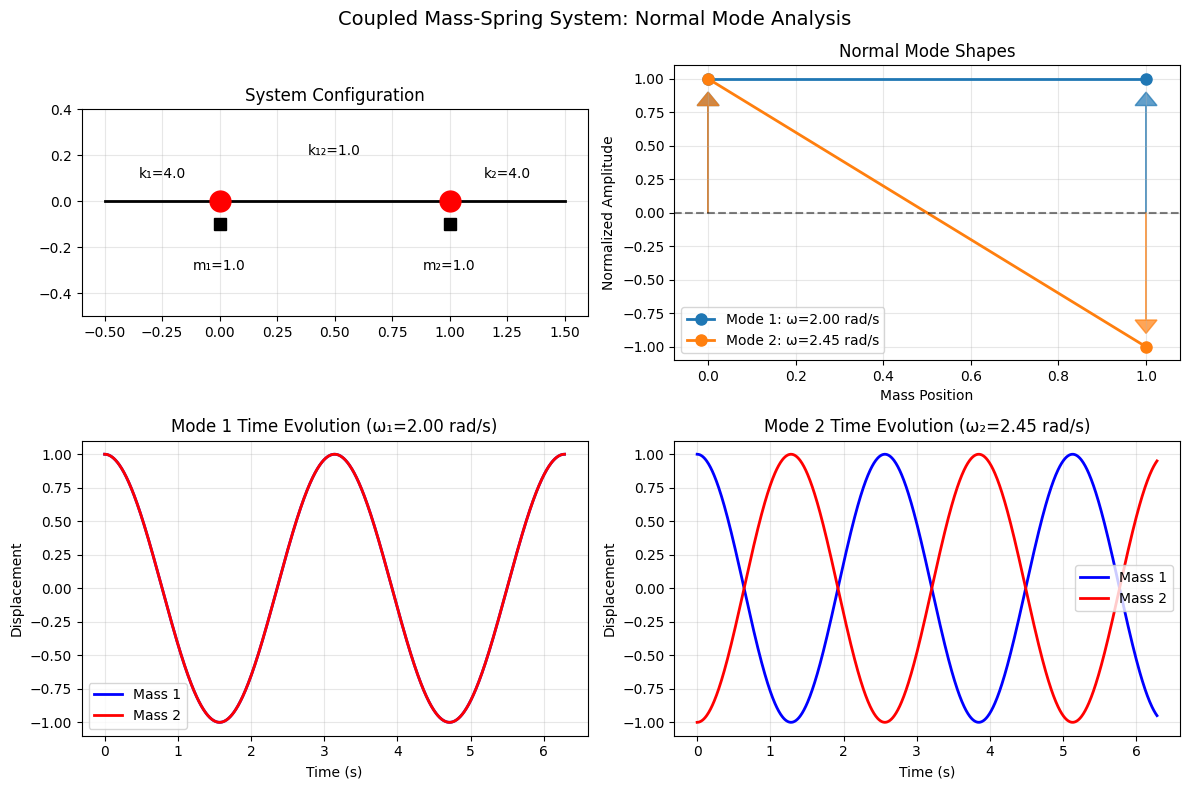

Mode 1: Both masses move in-phase (symmetric mode)
Mode 2: Masses move out-of-phase (antisymmetric mode)
Notice how Mode 2 has higher frequency due to the coupling spring being active


In [44]:
# Create visualization of the normal modes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Coupled Mass-Spring System: Normal Mode Analysis', fontsize=14)

# Parameters for visualization
x_positions = np.array([0, 1])  # Equilibrium positions of masses
t = np.linspace(0, 4*np.pi/omega[0], 1000)  # Time array

# Plot 1: System schematic
ax = axes[0, 0]
ax.plot([-0.5, 0, 1, 1.5], [0, 0, 0, 0], 'k-', linewidth=2)
ax.plot([0, 1], [0, 0], 'ro', markersize=15, label='Masses')
ax.plot([0, 1], [-0.1, -0.1], 'ks', markersize=8)
ax.text(0, -0.3, f'm₁={m1}', ha='center', fontsize=10)
ax.text(1, -0.3, f'm₂={m2}', ha='center', fontsize=10)
ax.text(0.5, 0.2, f'k₁₂={k12}', ha='center', fontsize=10)
ax.text(-0.25, 0.1, f'k₁={k1}', ha='center', fontsize=10)
ax.text(1.25, 0.1, f'k₂={k2}', ha='center', fontsize=10)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(-0.5, 0.4)
ax.set_title('System Configuration')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)


# Plot 2: Mode shapes
ax = axes[0, 1]
for i, (freq, mode) in enumerate(zip(omega, modes.T)):
    normalized_mode = mode / np.max(np.abs(mode))
    ax.plot(x_positions, normalized_mode, 'o-', linewidth=2, markersize=8,
            label=f'Mode {i+1}: ω={freq:.2f} rad/s')
    # Add arrows to show direction
    for j, (x, y) in enumerate(zip(x_positions, normalized_mode)):
        if abs(y) > 0.1:  # Only draw significant arrows
            ax.arrow(x, 0, 0, y*0.8, head_width=0.05, head_length=0.1, 
                    fc=f'C{i}', ec=f'C{i}', alpha=0.7)

ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel('Mass Position')
ax.set_ylabel('Normalized Amplitude')
ax.set_title('Normal Mode Shapes')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Time evolution of Mode 1 (easierin-phase)
ax = axes[1, 0]
mode1_normalized = modes[:, 0] / np.max(np.abs(modes[:, 0]))
A1 = 1.0  # Amplitude
x1_t = A1 * mode1_normalized[0] * np.cos(omega[0] * t)
x2_t = A1 * mode1_normalized[1] * np.cos(omega[0] * t)

ax.plot(t, x1_t, 'b-', label='Mass 1', linewidth=2)
ax.plot(t, x2_t, 'r-', label='Mass 2', linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement')
ax.set_title(f'Mode 1 Time Evolution (ω₁={omega[0]:.2f} rad/s)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Time evolution of Mode 2 (out-of-phase)
ax = axes[1, 1]
mode2_normalized = modes[:, 1] / np.max(np.abs(modes[:, 1]))
A2 = 1.0  # Amplitude
x1_t = A2 * mode2_normalized[0] * np.cos(omega[1] * t)
x2_t = A2 * mode2_normalized[1] * np.cos(omega[1] * t)

ax.plot(t, x1_t, 'b-', label='Mass 1', linewidth=2)
ax.plot(t, x2_t, 'r-', label='Mass 2', linewidth=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement')
ax.set_title(f'Mode 2 Time Evolution (ω₂={omega[1]:.2f} rad/s)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Mode 1: Both masses move in-phase (symmetric mode)")
print("Mode 2: Masses move out-of-phase (antisymmetric mode)")
print("Notice how Mode 2 has higher frequency due to the coupling spring being active")

Try running this again with parameters of your choice!